# LinearRegression Sparks Foundation GRIP JULY2021 - Task 1 
### Name : M.Aditya
#### Task : To predict the percentage of students based on no. of study hours using linear regression

##  Main things to do 

    1. Using the whole data without spliting the dataset
    2. Spliting the data into training and testing data
        - Predict y value using linear regression predict function 
        - Predict y value using y = mx + c formula
        - Compare the predicted values and plot a graph
    3. Find the scores for 9.25 hrs of study

In [39]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#### To read the csv file using pandas

In [6]:
df =  pd.read_csv("student_scores - student_scores.csv")

In [7]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.Hours,df.Scores

(0     2.5
 1     5.1
 2     3.2
 3     8.5
 4     3.5
 5     1.5
 6     9.2
 7     5.5
 8     8.3
 9     2.7
 10    7.7
 11    5.9
 12    4.5
 13    3.3
 14    1.1
 15    8.9
 16    2.5
 17    1.9
 18    6.1
 19    7.4
 20    2.7
 21    4.8
 22    3.8
 23    6.9
 24    7.8
 Name: Hours, dtype: float64,
 0     21
 1     47
 2     27
 3     75
 4     30
 5     20
 6     88
 7     60
 8     81
 9     25
 10    85
 11    62
 12    41
 13    42
 14    17
 15    95
 16    30
 17    24
 18    67
 19    69
 20    30
 21    54
 22    35
 23    76
 24    86
 Name: Scores, dtype: int64)

#### Model Creation

In [9]:
model = LinearRegression()

## Without spliting the dataset Into training and testing parts


In [10]:
model.fit(df[['Hours']],df.Scores)

LinearRegression()

In [11]:
model.coef_,model.intercept_

(array([9.77580339]), 2.483673405373196)

In [12]:
yh_wout_split = model.predict([[9.25]])

In [13]:
yh_wout_split

array([92.90985477])

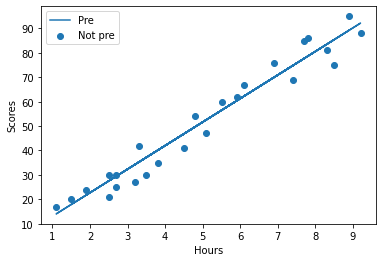

In [69]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(df[['Hours']],df.Scores,label="Not pre")
plt.plot(df[['Hours']],model.predict(df[['Hours']]),label="Pre")
plt.legend()


## Now by spliting the dataset into training part and testing part

In [29]:
from sklearn.model_selection import train_test_split

In [41]:
X = df['Hours']
y= df['Scores']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [43]:
X_train,y_train

(5     1.5
 2     3.2
 12    4.5
 15    8.9
 3     8.5
 4     3.5
 20    2.7
 17    1.9
 21    4.8
 18    6.1
 24    7.8
 7     5.5
 10    7.7
 14    1.1
 19    7.4
 6     9.2
 Name: Hours, dtype: float64,
 5     20
 2     27
 12    41
 15    95
 3     75
 4     30
 20    30
 17    24
 21    54
 18    67
 24    86
 7     60
 10    85
 14    17
 19    69
 6     88
 Name: Scores, dtype: int64)

In [44]:
X_test,y_test

(8     8.3
 16    2.5
 0     2.5
 23    6.9
 11    5.9
 9     2.7
 13    3.3
 1     5.1
 22    3.8
 Name: Hours, dtype: float64,
 8     81
 16    30
 0     21
 23    76
 11    62
 9     25
 13    42
 1     47
 22    35
 Name: Scores, dtype: int64)

### Now we will start training the model
 - If we dont convert X into 2d array it wont work
 - Similarly y needs to be a 1d array 

In [45]:
X_train.shape, y_train.shape
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_train.shape

(16, 1)

In [46]:
X_test.shape

(9, 1)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
model.coef_,model.intercept_

(array([9.65029083]), 3.4050301755918966)

In [49]:
y_pre = model.predict(X_test)

In [50]:
data = {'y_test':y_test,'y_pre':y_pre}
dt =pd.DataFrame(data)


### Now we can compare the actual values and the values which have been predicted

In [51]:
dt

,y_test,y_pre
8,81,83.502444
16,30,27.530757
0,21,27.530757
23,76,69.992037
11,62,60.341746
9,25,29.460815
13,42,35.250990
1,47,52.621513
22,35,40.076135


### Now lets test using y = mx+c formula 

In [52]:
y_form = model.coef_*X_test + model.intercept_

In [53]:
y_pre,y_form

(array([83.50244409, 27.53075726, 27.53075726, 69.99203692, 60.34174609,
        29.46081542, 35.25098992, 52.62151342, 40.07613534]),
 array([[83.50244409],
        [27.53075726],
        [27.53075726],
        [69.99203692],
        [60.34174609],
        [29.46081542],
        [35.25098992],
        [52.62151342],
        [40.07613534]]))

In [54]:
y_form.shape, y_pre.shape

((9, 1), (9,))

### We use flatten to convert the array from 2d to 1d array

In [55]:
y_form = y_form.reshape(1,-1)
y_form=y_form.flatten()
y_form.shape

(9,)

In [56]:
y_form

array([83.50244409, 27.53075726, 27.53075726, 69.99203692, 60.34174609,
       29.46081542, 35.25098992, 52.62151342, 40.07613534])

In [57]:
data1 = {'y_test':y_test,'y_pre':y_pre,'y_form':y_form }
ds =pd.DataFrame(data1)

In [58]:
ds

,y_test,y_pre,y_form
8,81,83.502444,83.502444
16,30,27.530757,27.530757
0,21,27.530757,27.530757
23,76,69.992037,69.992037
11,62,60.341746,60.341746
9,25,29.460815,29.460815
13,42,35.250990,35.250990
1,47,52.621513,52.621513
22,35,40.076135,40.076135


### We can evaluate the model by trying out mean squared error formula
- Here we can compare using actual y value and predicted value

In [63]:
from sklearn.metrics import mean_absolute_error 
print('Mean absolute error: ',mean_absolute_error(y_test,y_pre))

Mean absolute error:  4.564015037730867


### Here only one colour is shown because the Predict value and the formula have the same values as observed from the dataframe above. That is why the orange line covers the blue line

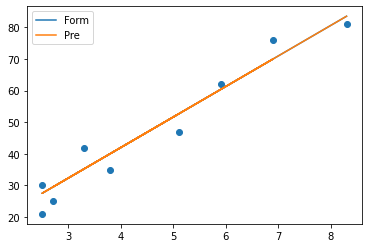

In [59]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_form,label="Form")
plt.plot(X_test,y_pre,label="Pre")
plt.legend()

## Now lets the predict the score for 9.25 hrs

In [60]:
X_to_pred = [[9.25]]
y_score = model.predict(X_to_pred)
y_score

array([92.67022038])

In [61]:
yh_wout_split


array([92.90985477])